## Exercise A

What is Gradient Descent?

Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to $\theta$. It is used to learn a model by minimizing the cost function $J(\theta)$ w.r.t the parameters $\theta$. The cost function is defined as the error between the observed data $y$ and the prediction $$\hat{y}=h_\theta(x)=\theta^T x=\theta_0+\theta_1 x_1.$$

During the learning process, we iteratively calculate the gradient of the cost function and update the parameters of the model. The parameters are then updated in the opposite direction of the gradient of $J(\theta)$: $\nabla J(\theta)$.

If $\nabla J(\theta)>0$, the parameters should be decreased and vice versa; until having the smallest possible error of the cost function $J(\theta)$ by following an update rule $$\theta:=\theta-\eta\nabla J(\theta)$$ where $\eta$ is the learning rate that defines how far to go in each step.

## Exercise C

Fit a linear regression and plot the cost function

$$J = \frac{1}{m}\sum_{i=1}^m (y_i - \theta_0 - \theta_i x_i)^2 $$

for the *gas consumption dataset with tax, income, highway, drivers and gas*.

This is a univariate problem where your X is the percentage of population driving and y is the gas consumption in million gallons.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/kannansingaravelu/datasets/main/gas_consumption.csv",
                 names = ['tax', 'income', 'highway', 'drivers','gas'])
df

,tax,income,highway,drivers,gas
1,9.00,3571,1976,0.525,541
2,9.00,4092,1250,0.572,524
3,9.00,3865,1586,0.580,561
4,7.50,4870,2351,0.529,414
5,8.00,4399,431,0.544,410
6,10.00,5342,1333,0.571,457
7,8.00,5319,11868,0.451,344
8,8.00,5126,2138,0.553,467
9,8.00,4447,8577,0.529,464
10,7.00,4512,8507,0.552,498


In [16]:
# initialise the linear regressor
lr = LinearRegression()

# fit
# reg drivers on gas
lr.fit(df[['drivers']], df['gas']) # fit(X,y)

lr.intercept_, lr.coef_

(-227.3091174945256, array([1409.84211133]))

In [24]:
# Predict
df['predicted_gas'] = lr.predict(df[['drivers']])
df.head()  # now added predicted_gas

,tax,income,highway,drivers,gas,predicted_gas
1,9.0,3571,1976,0.525,541,512.857991
2,9.0,4092,1250,0.572,524,579.120570
3,9.0,3865,1586,0.580,561,590.399307
4,7.5,4870,2351,0.529,414,518.497359
5,8.0,4399,431,0.544,410,539.644991


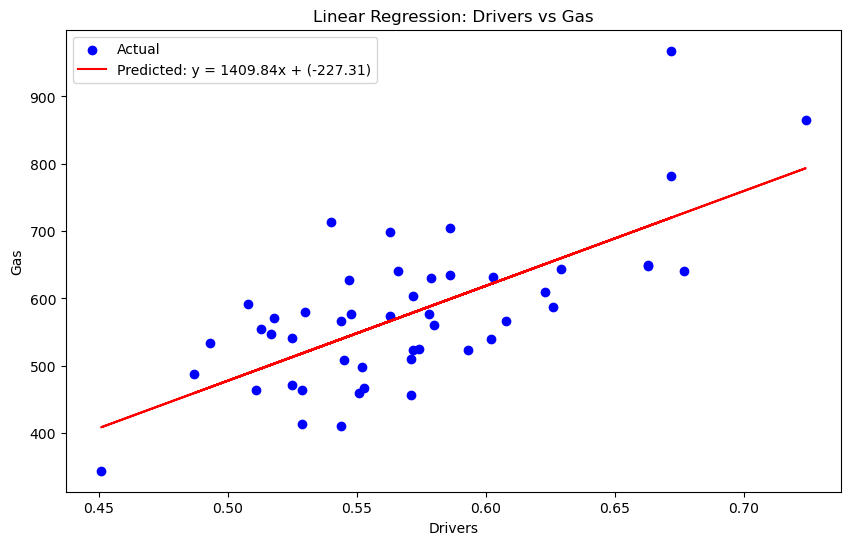

In [36]:
# Plotting
plt.figure(figsize=(10,6))
plt.scatter(df['drivers'], df['gas'], color='blue', label='Actual')
plt.plot(df['drivers'], df['predicted_gas'], color='red', label=f'Predicted: y = {lr.coef_[0]:.2f}x + ({lr.intercept_:.2f})')

plt.xlabel('Drivers')
plt.ylabel('Gas')
plt.title('Linear Regression: Drivers vs Gas')
plt.legend()
plt.show()

The objective of Linear Regression is to minimize the total square error where the residual depends on the model parameters $\theta_0$ and $\theta_1$. Let's now plot the cost function with respect to $\theta_1$.

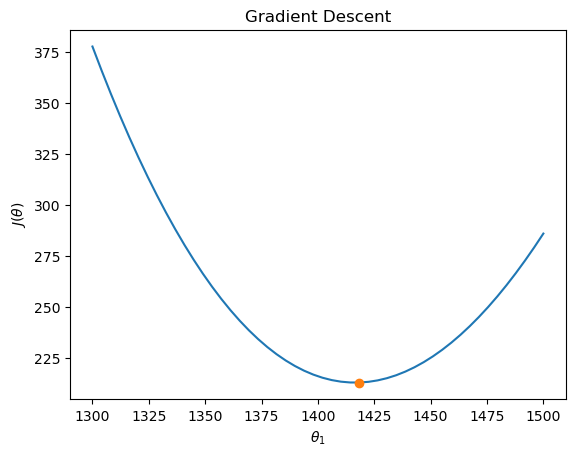

In [20]:
# intercept
theta0 = lr.intercept_
# parameters wrt to x
theta1 = np.linspace(1300, 1500)
# mean square error
mse = [1/m * ((df['gas'] - (theta0 + m * df['drivers']))**2).sum() for m in theta1]

plt.plot(theta1, mse)
plt.xlabel(r"${\theta_1}$")
plt.ylabel(r"${J(\theta)}$")
plt.plot(1418.367347, 212.965817, marker="o") # _cost = pd.DataFrame(list(zip(theta1,mse)))
plt.title('Gradient Descent')
plt.show()